In [35]:
from pathlib import Path
path_to_data_notebook = Path.cwd().parent.parent / "Data" / "Data_v2.ipynb"
print(path_to_data_notebook)
%run {path_to_data_notebook}

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import datetime 
import time

/home/pc/moje/python_projects/adsorbents_isotherms/Data/Data_v2.ipynb
/home/pc/moje/python_projects/adsorbents_isotherms/Data/all_data.csv
oryginal_isotherms: 897
oryginal_bet: 897
oryginal_info: 897 



In [36]:
def calculate_time(transcription_time):
    timedelta_obj = datetime.timedelta(seconds=int(transcription_time))
    return str(timedelta_obj)

In [37]:
size = 30
X,y,info,oryginal = get_data(size,flat=True);
# for e in X[0]:
#     print(e)
y_all_nested = []
for i in range(len(y)):
    y_all_nested.append([y[i],info[i]])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_nested, y_test_nested, = train_test_split(X, y_all_nested, test_size=0.02, random_state=42) #random_state=42
y_train = [item[0] for item in y_train_nested]
y_train = np.array(y_train).astype(float)
y_test = [item[0] for item in y_test_nested]
y_test = np.array(y_test).astype(float)
# print(y_train)
# X_train = X_train.reshape(X_train.shape[0], -1)
# print(X[0])
#for n in X[0]:
#    print(n)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train[0])
print(len(X_train))
print(len(X_test))

x_range_to_cut->False, return whole x range
flat=True, returned one dimension data= [x,y,x,y,x,y,...]
X (897, 60)
y (897,)
info 897
oryginal_isotherms 897
return: X, y, info, oryginal_isotherms
879
18


In [38]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Num GPUs Available:  1


In [39]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [40]:
epochs_number = 1000

model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10000, activation='relu'), 
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)                      
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics=['mae', 'mse']
model.compile(optimizer=optimizer, loss='mae', metrics=metrics)



# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# history  =  model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)
start = time.time()
history  =  model.fit(X_train, y_train, epochs=epochs_number, batch_size=30,validation_split=0.1, verbose=2)
end = time.time()
transcription_time = calculate_time(round((end - start),2))
print(f"Model training time: "+transcription_time)
model.summary()
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")




Epoch 1/1000
27/27 - 2s - 80ms/step - loss: 887.8426 - mae: 887.8426 - mse: 1153292.5000 - val_loss: 491.6926 - val_mae: 491.6926 - val_mse: 347748.3125
Epoch 2/1000
27/27 - 0s - 4ms/step - loss: 384.3343 - mae: 384.3343 - mse: 236882.4531 - val_loss: 300.0610 - val_mae: 300.0610 - val_mse: 145503.4844
Epoch 3/1000
27/27 - 0s - 4ms/step - loss: 310.9986 - mae: 310.9986 - mse: 159848.0469 - val_loss: 298.9751 - val_mae: 298.9751 - val_mse: 155842.4062
Epoch 4/1000
27/27 - 0s - 4ms/step - loss: 291.0029 - mae: 291.0029 - mse: 146173.7812 - val_loss: 268.8763 - val_mae: 268.8763 - val_mse: 112191.0547
Epoch 5/1000
27/27 - 0s - 4ms/step - loss: 272.8112 - mae: 272.8112 - mse: 121686.7188 - val_loss: 245.8205 - val_mae: 245.8205 - val_mse: 94389.2422
Epoch 6/1000
27/27 - 0s - 4ms/step - loss: 249.4919 - mae: 249.4919 - mse: 104197.5938 - val_loss: 232.0490 - val_mae: 232.0490 - val_mse: 80369.0078
Epoch 7/1000
27/27 - 0s - 4ms/step - loss: 230.1568 - mae: 230.1568 - mse: 89901.8281 - val_lo

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10000)          │       610,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │     1,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,830,605 (18.43 MB)

 Trainable params: 1,610,201 (6.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,220,404 (12.28 MB)

Metrics: [49.28645706176758, 49.28645706176758, 4913.2158203125]
mae = 49.28645706176758
mse = 4913.2158203125


Model training time without gpu, epoch = 1000 : 0:01:10

In [41]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")

Metrics: [49.28645706176758, 49.28645706176758, 4913.2158203125]
mae = 49.28645706176758
mse = 4913.2158203125


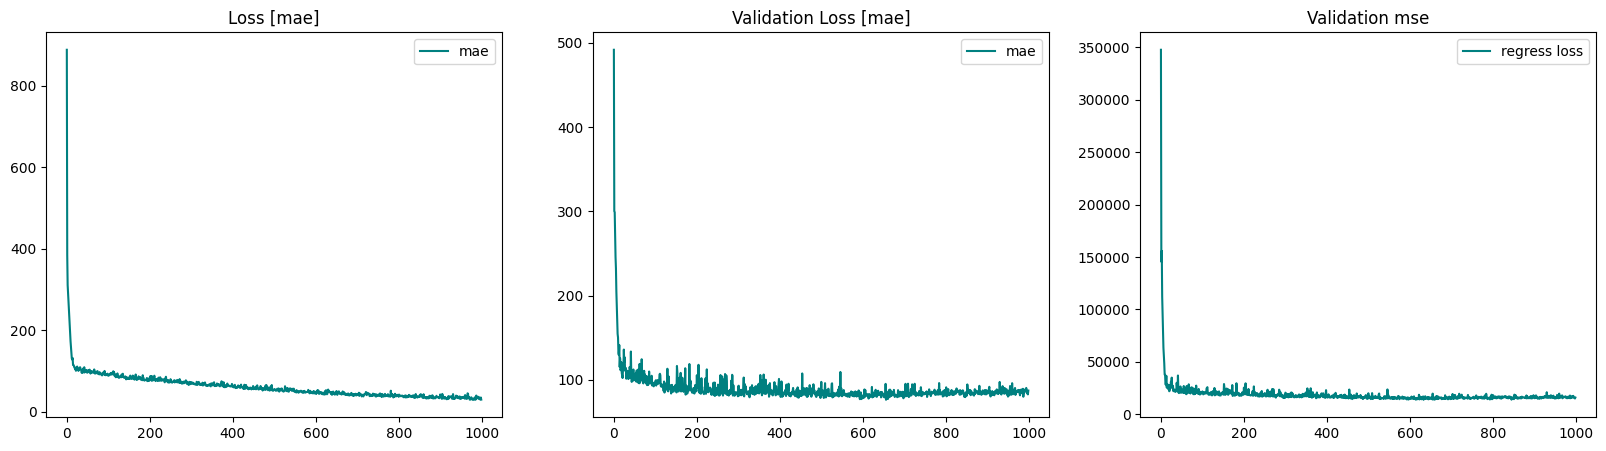

In [42]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(history.history['loss'], color='teal', label='mae')
# ax[0].plot(history.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss [mae]')
ax[0].legend()

ax[1].plot(history.history['val_loss'], color='teal', label='mae')
# ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Validation Loss [mae]')
ax[1].legend()

ax[2].plot(history.history['val_mse'], color='teal', label='regress loss')
# ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Validation mse')
ax[2].legend()

plt.show()

In [43]:
error_threshold = 30
max_error_threshold = 30
predictions = model.predict(X_test, verbose=0)
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    # if(abs(predictions[i] - y_test[i]) > max_error_threshold):
    #     print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)

print("\nALL:")
for i in range(len(predictions)):
    print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")

print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")


ALL:
 przewidywana --> [1037.3933]     1041.9 <-- rzeczyswista     blad: [4.50668945]  ['Data58', '850-45m', '5_4', 'II']
 przewidywana --> [439.9592]     378.0 <-- rzeczyswista     blad: [61.959198]  ['Data115', 'CAC1900', '1', 'I']
 przewidywana --> [764.4493]     770.1 <-- rzeczyswista     blad: [5.65072021]  ['Data58', '800-1h', '5_3', 'II']
 przewidywana --> [1414.8706]     1343.0 <-- rzeczyswista     blad: [71.87060547]  ['Data150', '10stC', '4', 'I_II']
 przewidywana --> [556.1957]     659.0 <-- rzeczyswista     blad: [102.80432129]  ['Data7', 'RK-600', '3', 'I']
 przewidywana --> [797.75806]     817.2 <-- rzeczyswista     blad: [19.44194336]  ['Data58', '800-1h15m', '5_3', 'II']
 przewidywana --> [1325.0957]     1387.0 <-- rzeczyswista     blad: [61.90429688]  ['Data65', 'R2-500', '2_2', 'I_IV']
 przewidywana --> [2065.3052]     2064.0 <-- rzeczyswista     blad: [1.30517578]  ['Data59', 'CMS500', '2', 'I_II']
 przewidywana --> [414.4484]     448.0 <-- rzeczyswista     blad: [3

In [11]:
# model.save("model_500_mae27_maxerror-57_warstwy-100-10000-50.keras")

In [12]:
from tensorflow.keras.models import load_model
model_name = 'model_500_mae27_maxerror-57_warstwy-100-10000-50.keras'
modelos = load_model(model_name)
predictions = modelos.predict(X_test, verbose=0)
print(f"len {len(X_test)}")
error_threshold = 30
max_error_threshold = 30
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    if(abs(predictions[i] - y_test[i]) > max_error_threshold):
        print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)
print("\nALL:")
for i in range(len(predictions)):
    print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        


print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")

len 19
 przewidywana --> [2529.8972]     2662.0 <-- rzeczyswista     blad: [132.1027832]  ['Data114', 'CS', '1', 'I']
 przewidywana --> [2221.2834]     2388.0 <-- rzeczyswista     blad: [166.71655273]  ['Data136', '1.5h_f5', '5', 'I']
 przewidywana --> [432.5839]     383.5 <-- rzeczyswista     blad: [49.08389282]  ['Data91', 'AC-ME1', '3_2', 'I']
 przewidywana --> [338.88895]     387.0 <-- rzeczyswista     blad: [48.11105347]  ['Data62', 'NC700-2-1.5', '7', 'I_II']
 przewidywana --> [805.2466]     927.0 <-- rzeczyswista     blad: [121.75341797]  ['Data148', 'WN700', '1_2', 'I']
 przewidywana --> [399.5261]     583.0 <-- rzeczyswista     blad: [183.47390747]  ['Data54', 'CZ0.15', '3', 'I']
 przewidywana --> [468.1684]     415.0 <-- rzeczyswista     blad: [53.168396]  ['Data117', 'CTPC', '2_1', 'I_IV']
 przewidywana --> [832.7168]     780.0 <-- rzeczyswista     blad: [52.71679688]  ['Data45', 'C-800-40', '1', 'I']
 przewidywana --> [718.71436]     665.0 <-- rzeczyswista     blad: [53.714

In [ ]:
#  przewidywana --> [553.189]     249.0 <-- rzeczyswista     blad: [304.18903]  ['Data125', 'coconut_shells_6h', '7']
#  przewidywana --> [1967.7969]     1616.22 <-- rzeczyswista     blad: [351.5769]  ['Data153', 'GC-C04', '4']
#  przewidywana --> [1556.715]     1193.2 <-- rzeczyswista     blad: [363.515]  ['Data54', 'CZ0.65', '3']
#  przewidywana --> [1296.133]     938.0 <-- rzeczyswista     blad: [358.13306]  ['Data15', '3', '1']
#  przewidywana --> [732.7655]     1188.0 <-- rzeczyswista     blad: [455.2345]  ['Data156', 'MCAC-2-1', '4']
#  przewidywana --> [573.38586]     976.0 <-- rzeczyswista     blad: [402.61414]  ['Data47', 'ACF30M-HNO3', '3']
#  przewidywana --> [350.85513]     823.0 <-- rzeczyswista     blad: [472.14487]  ['Data86', 'ACZ3', '2']
# max error: [472.14487]  dla ['Data86', 'ACZ3', '2'] 
# for error thteshold[50] - 57.8%     100 izotermy na 173